In [38]:
from __future__ import print_function, division

%matplotlib inline

import pandas as pd
import numpy as np

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
dct = thinkstats2.ReadStataDct('gss_2000_2016/GSS.dct')
df = dct.ReadFixedWidth('gss_2000_2016/GSS.dat')
print(df.shape)
df.head()

(24350, 38)


,year,compuse,webmob,emailmin,emailhr,usewww,wwwhr,wwwmin,intrhome,parelkid,...,srcbelt,relig,denom,fund,relig16,denom16,fund16,sprel,bible,relactiv1
0,2000,1,0,0,2,1,5,0,0,0,...,3,1,14,1,1,14,1,0,2,0
1,2000,1,0,0,0,2,-1,-1,0,0,...,3,1,18,1,2,0,2,0,0,0
2,2000,2,0,-1,-1,0,-1,-1,0,0,...,3,1,70,2,4,0,3,0,9,0
3,2000,1,0,0,3,1,2,0,0,0,...,3,10,0,9,1,14,1,0,2,0
4,2000,1,0,0,15,1,1,0,0,0,...,3,4,0,3,4,0,3,0,3,0


In [3]:
for colname in df.columns:
    print(colname, end='  ')

year  god  compuse  webmob  emailmin  emailhr  usewww  wwwhr  wwwmin  intrhome  parelkid  hispanic  sei  cohort  ballot  wtssall  conclerg  bible  sprel  id_  age  educ  sex  race  res16  income  rincome  srcbelt  relig  denom  fund  relig16  denom16  fund16  sei10  

In [4]:
def values(df, varname):
    """Values and counts in index order.
    
    df: DataFrame
    varname: strign column name
    
    returns: Series that maps from value to frequency
    """
    return df[varname].value_counts().sort_index()

In [5]:
values(df, 'year')

2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64

In [6]:
cycle = df[df.year==2008]
values(cycle, 'wwwhr')

-1    2023
Name: wwwhr, dtype: int64

In [7]:
values(df, 'wwwhr')

-1      12726
 0       1202
 1       1517
 2       1304
 3        819
 4        593
 5        913
 6        358
 7        449
 8        294
 9         37
 10       946
 11        13
 12       201
 13        18
 14       231
 15       420
 16        35
 17        11
 18        22
 19         1
 20       559
 21        78
 22         7
 23         7
 24        43
 25       173
 26         2
 27         5
 28        45
        ...  
 49         2
 50        79
 55         4
 56         3
 60        48
 63         2
 64         1
 65         6
 66         1
 70        24
 72         6
 75         6
 80        20
 84         5
 85         1
 86         1
 90         4
 91         2
 98         1
 100       11
 112        2
 120        5
 122        1
 130        1
 132        1
 140        1
 168        2
 184        1
 998       54
 999      451
Name: wwwhr, dtype: int64

In [8]:
asked = df[df.wwwhr != -1].copy()
asked.shape

(11624, 35)

In [9]:
values(asked, 'year')

2000    1054
2002    1649
2004    1834
2006    2005
2010    1056
2012    1021
2014    1412
2016    1593
Name: year, dtype: int64

In [10]:
def fill_missing(df, varname, badvals=[98, 99]):
    """Fill missing data with random values.
    
    df: DataFrame
    varname: string column name
    badvals: list of values to be replaced
    """
    df[varname].replace(badvals, np.nan, inplace=True)
    null = df[varname].isnull()
    fill = np.random.choice(df[varname].dropna(), sum(null), replace=True)
    df.loc[null, varname] = fill
    return sum(null)

In [11]:
fill_missing(asked, 'relig')
values(asked, 'relig')

1.0     5513
2.0     2745
3.0      231
4.0     2244
5.0      144
6.0       99
7.0       53
8.0       22
9.0       63
10.0      48
11.0     380
12.0      13
13.0      69
Name: relig, dtype: int64

In [12]:
asked['has_relig'] = (df.relig != 4).astype(int)
values(asked, 'has_relig')

0    2234
1    9390
Name: has_relig, dtype: int64

In [13]:
fill_missing(asked, 'wwwhr', [998, 999])

505

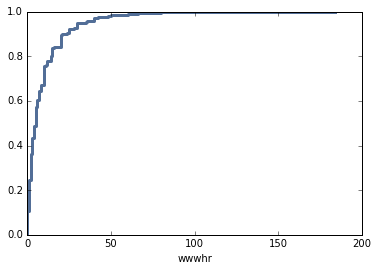

In [14]:
cdf = thinkstats2.Cdf(asked.wwwhr)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='wwwhr')

In [15]:
asked.wwwhr.describe()

count    11624.000000
mean         9.102632
std         12.973578
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        184.000000
Name: wwwhr, dtype: float64

In [16]:
results = smf.logit('has_relig ~ wwwhr', data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.484813
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11622
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                0.009333
Time:                        16:10:21   Log-Likelihood:                -5635.5
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                 6.722e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6024      0.029     55.056      0.000       1.545       1.659
wwwhr         -0.0168      0.002    -10.514      0.000      -0.020      -0.014
==============================================================================
"""

In [17]:
asked['www50'] = asked.wwwhr >= 5
asked['www75'] = asked.wwwhr >= 10

In [18]:
results = smf.logit('has_relig ~ www50', data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.485126
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11622
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                0.008694
Time:                        16:10:21   Log-Likelihood:                -5639.1
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                 2.640e-23
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6949      0.037     46.241      0.000       1.623       1.767
www50[T.True]    -0.4729      0.048     -9.860      0.000      -0.567      -0.379
=================================================================================
"""

In [19]:
results = smf.logit('has_relig ~ www50 + www75', data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.484782
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11621
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                0.009398
Time:                        16:10:22   Log-Likelihood:                -5635.1
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                 6.049e-24
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6949      0.037     46.241      0.000       1.623       1.767
www50[T.True]    -0.3529      0.065     -5.456      0.000      -0.480      -0.226
www75[T.True]    -0.1843      0.065     -2.814      0.005      -0.313      -0.056
=================================================================================
"""

In [20]:
values(asked, 'sex')

1    5271
2    6353
Name: sex, dtype: int64

In [21]:
results = smf.logit('has_relig ~ www50 + www75 + C(sex)', data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.481200
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11620
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.01672
Time:                        16:10:22   Log-Likelihood:                -5593.5
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                 5.548e-41
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4583      0.044     33.118      0.000       1.372       1.545
www50[T.True]    -0.3318      0.065     -5.109      0.000      -0.459      -0.205
www75[T.True]    -0.1746      0.066     -2.657      0.008      -0.303      -0.046
C(sex)[T.2]       0.4334      0.048      9.105      0.000       0.340       0.527
=================================================================================
"""

In [22]:
fill_missing(asked, 'educ')
values(asked, 'educ')

0.0       14
1.0        3
2.0       26
3.0        8
4.0       10
5.0       14
6.0       62
7.0       17
8.0       90
9.0      125
10.0     213
11.0     376
12.0    2664
13.0    1117
14.0    1770
15.0     755
16.0    2337
17.0     554
18.0     721
19.0     270
20.0     478
Name: educ, dtype: int64

In [23]:
asked['educ_from_12'] = asked.educ - 12

In [24]:
formula = 'has_relig ~ www50 + www75 + C(sex) + educ_from_12'
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.480852
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11619
Method:                           MLE   Df Model:                            4
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.01743
Time:                        16:10:22   Log-Likelihood:                -5589.4
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                 8.841e-42
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5108      0.048     31.462      0.000       1.417       1.605
www50[T.True]    -0.3227      0.065     -4.961      0.000      -0.450      -0.195
www75[T.True]    -0.1695      0.066     -2.576      0.010      -0.298      -0.041
C(sex)[T.2]       0.4302      0.048      9.030      0.000       0.337       0.524
educ_from_12     -0.0246      0.009     -2.834      0.005      -0.042      -0.008
=================================================================================
"""

In [25]:
fill_missing(asked, 'relig16')
values(asked, 'relig16')

1.0     6082
2.0     3788
3.0      248
4.0      930
5.0       54
6.0       69
7.0       59
8.0        6
9.0       76
10.0      56
11.0     232
12.0       7
13.0      17
Name: relig16, dtype: int64

In [26]:
asked['raised'] = asked.relig16 != 4

In [27]:
formula = 'has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised'
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.443464
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11618
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.09383
Time:                        16:10:23   Log-Likelihood:                -5154.8
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                1.473e-228
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3816      0.081     -4.734      0.000      -0.540      -0.224
www50[T.True]     -0.3219      0.068     -4.705      0.000      -0.456      -0.188
www75[T.True]     -0.1542      0.069     -2.221      0.026      -0.290      -0.018
C(sex)[T.2]        0.4412      0.050      8.786      0.000       0.343       0.540
raised[T.True]     2.1554      0.074     29.285      0.000       2.011       2.300
educ_from_12      -0.0327      0.009     -3.575      0.000      -0.051      -0.015
==================================================================================
"""

In [28]:
fill_missing(asked, 'income')
values(asked, 'income')

1.0      122
2.0      120
3.0       69
4.0       51
5.0       62
6.0       77
7.0       60
8.0      144
9.0      506
10.0     501
11.0     652
12.0    8435
13.0     825
Name: income, dtype: int64

In [29]:
np.sum(asked['income'] >= 12) / len(asked)

0.79662766689607711

In [30]:
asked['top75_income'] = asked['income'] >= 12

In [31]:
formula = 'has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + top75_income'
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.441935
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11617
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.09695
Time:                        16:10:23   Log-Likelihood:                -5137.1
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                4.654e-235
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6553      0.093     -7.058      0.000      -0.837      -0.473
www50[T.True]           -0.3169      0.069     -4.624      0.000      -0.451      -0.183
www75[T.True]           -0.1504      0.070     -2.161      0.031      -0.287      -0.014
C(sex)[T.2]              0.4635      0.050      9.182      0.000       0.365       0.562
raised[T.True]           2.1503      0.074     29.128      0.000       2.006       2.295
top75_income[T.True]     0.3714      0.061      6.046      0.000       0.251       0.492
educ_from_12            -0.0447      0.009     -4.755      0.000      -0.063      -0.026
========================================================================================
"""

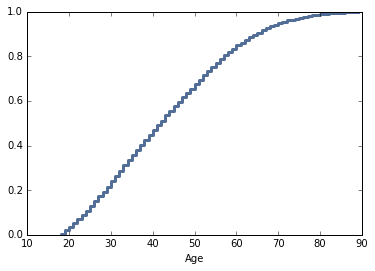

In [32]:
fill_missing(asked, 'age')
cdf = thinkstats2.Cdf(asked.age)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Age')

In [33]:
fill_missing(asked, 'cohort', [9999])

39

In [34]:
asked['born_from_1960'] = asked.cohort - 1960

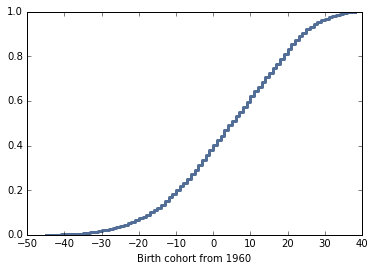

In [35]:
cdf = thinkstats2.Cdf(asked.born_from_1960)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Birth cohort from 1960')

In [36]:
formula = ('has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + '
    'top75_income + born_from_1960')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.435746
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11616
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                  0.1096
Time:                        16:10:24   Log-Likelihood:                -5065.1
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                5.063e-265
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4173      0.096     -4.362      0.000      -0.605      -0.230
www50[T.True]           -0.2397      0.069     -3.458      0.001      -0.376      -0.104
www75[T.True]           -0.0947      0.070     -1.348      0.178      -0.232       0.043
C(sex)[T.2]              0.4780      0.051      9.407      0.000       0.378       0.578
raised[T.True]           2.0827      0.075     27.954      0.000       1.937       2.229
top75_income[T.True]     0.2611      0.063      4.173      0.000       0.138       0.384
educ_from_12            -0.0593      0.010     -6.125      0.000      -0.078      -0.040
born_from_1960          -0.0207      0.002    -11.752      0.000      -0.024      -0.017
========================================================================================
"""

In [37]:
asked['older'] = asked.age > 70

In [38]:
formula = ('has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + '
    'top75_income + born_from_1960 + age')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.435039
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11615
Method:                           MLE   Df Model:                            8
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                  0.1110
Time:                        16:10:24   Log-Likelihood:                -5056.9
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                1.968e-267
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4725      0.239      1.977      0.048       0.004       0.941
www50[T.True]           -0.2202      0.070     -3.166      0.002      -0.357      -0.084
www75[T.True]           -0.0738      0.070     -1.047      0.295      -0.212       0.064
C(sex)[T.2]              0.4847      0.051      9.524      0.000       0.385       0.584
raised[T.True]           2.0875      0.075     27.971      0.000       1.941       2.234
top75_income[T.True]     0.2696      0.063      4.304      0.000       0.147       0.392
educ_from_12            -0.0606      0.010     -6.261      0.000      -0.080      -0.042
born_from_1960          -0.0384      0.005     -8.146      0.000      -0.048      -0.029
age                     -0.0193      0.005     -4.059      0.000      -0.029      -0.010
========================================================================================
"""

In [39]:
values(asked, 'srcbelt')

1     972
2    1547
3    1595
4    2049
5    4380
6    1081
Name: srcbelt, dtype: int64

In [40]:
asked['urban'] = asked.srcbelt <= 2
asked['rural'] = asked.srcbelt >= 5

In [41]:
formula = ('has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + '
    'top75_income + born_from_1960 + age + urban')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.434109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11614
Method:                           MLE   Df Model:                            9
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                  0.1129
Time:                        16:10:24   Log-Likelihood:                -5046.1
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                5.462e-271
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5152      0.239      2.154      0.031       0.046       0.984
www50[T.True]           -0.2200      0.070     -3.160      0.002      -0.356      -0.084
www75[T.True]           -0.0639      0.071     -0.905      0.366      -0.202       0.075
C(sex)[T.2]              0.4864      0.051      9.550      0.000       0.387       0.586
raised[T.True]           2.0964      0.075     28.040      0.000       1.950       2.243
top75_income[T.True]     0.2526      0.063      4.022      0.000       0.129       0.376
urban[T.True]           -0.2753      0.059     -4.700      0.000      -0.390      -0.160
educ_from_12            -0.0579      0.010     -5.976      0.000      -0.077      -0.039
born_from_1960          -0.0376      0.005     -7.971      0.000      -0.047      -0.028
age                     -0.0190      0.005     -4.002      0.000      -0.028      -0.010
========================================================================================
"""

In [42]:
fill_missing(asked, 'res16', [8, 9, 0])
values(asked, 'res16')

1.0    1201
2.0     799
3.0    3793
4.0    2097
5.0    1884
6.0    1850
Name: res16, dtype: int64

In [43]:
asked['farm'] = asked.res16 == 1
asked['country'] = asked.res16 == 2
asked['city'] = asked.res16 == 6

In [44]:
formula = ('has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + '
           'top75_income + born_from_1960 + age + urban + country')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.433765
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11613
Method:                           MLE   Df Model:                           10
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                  0.1136
Time:                        16:10:25   Log-Likelihood:                -5042.1
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                1.264e-271
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4930      0.239      2.059      0.039       0.024       0.962
www50[T.True]           -0.2153      0.070     -3.090      0.002      -0.352      -0.079
www75[T.True]           -0.0623      0.071     -0.883      0.377      -0.201       0.076
C(sex)[T.2]              0.4903      0.051      9.618      0.000       0.390       0.590
raised[T.True]           2.0968      0.075     28.031      0.000       1.950       2.243
top75_income[T.True]     0.2535      0.063      4.037      0.000       0.130       0.377
urban[T.True]           -0.2676      0.059     -4.565      0.000      -0.383      -0.153
country[T.True]          0.3169      0.115      2.747      0.006       0.091       0.543
educ_from_12            -0.0573      0.010     -5.909      0.000      -0.076      -0.038
born_from_1960          -0.0373      0.005     -7.909      0.000      -0.047      -0.028
age                     -0.0192      0.005     -4.036      0.000      -0.029      -0.010
========================================================================================
"""

In [45]:
fill_missing(asked, 'hispanic')
values(asked, 'hispanic')

1.0     10362
2.0       743
3.0       146
4.0        52
5.0        41
6.0        22
7.0         6
8.0         9
9.0         2
10.0        7
11.0       17
15.0       28
20.0       21
21.0       13
22.0       24
23.0        9
24.0        9
25.0        3
30.0       68
31.0        1
35.0        3
40.0        4
41.0       11
45.0        3
46.0        4
47.0       10
50.0        6
Name: hispanic, dtype: int64

In [46]:
asked['hisp'] = asked.hispanic != 1

In [47]:
formula = ('has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + '
           'top75_income + born_from_1960 + age + urban + country + hisp')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.432973
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11612
Method:                           MLE   Df Model:                           11
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                  0.1153
Time:                        16:10:25   Log-Likelihood:                -5032.9
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                1.575e-274
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4908      0.240      2.048      0.041       0.021       0.960
www50[T.True]           -0.2158      0.070     -3.095      0.002      -0.353      -0.079
www75[T.True]           -0.0595      0.071     -0.842      0.400      -0.198       0.079
C(sex)[T.2]              0.4943      0.051      9.685      0.000       0.394       0.594
raised[T.True]           2.0747      0.075     27.659      0.000       1.928       2.222
top75_income[T.True]     0.2579      0.063      4.100      0.000       0.135       0.381
urban[T.True]           -0.2986      0.059     -5.051      0.000      -0.414      -0.183
country[T.True]          0.3287      0.115      2.850      0.004       0.103       0.555
hisp[T.True]             0.3702      0.089      4.179      0.000       0.197       0.544
educ_from_12            -0.0504      0.010     -5.096      0.000      -0.070      -0.031
born_from_1960          -0.0387      0.005     -8.182      0.000      -0.048      -0.029
age                     -0.0198      0.005     -4.149      0.000      -0.029      -0.010
========================================================================================
"""

In [48]:
#fill_missing(asked, 'race')
values(asked, 'race')

1    9082
2    1462
3    1080
Name: race, dtype: int64

In [49]:
formula = ('has_relig ~ www50 + www75 + C(sex) + educ_from_12 + raised + '
           'top75_income + born_from_1960 + age + urban + country + hisp + C(race)')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.430805
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11610
Method:                           MLE   Df Model:                           13
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                  0.1197
Time:                        16:10:26   Log-Likelihood:                -5007.7
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                2.635e-283
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4761      0.240      1.980      0.048       0.005       0.947
www50[T.True]           -0.2181      0.070     -3.118      0.002      -0.355      -0.081
www75[T.True]           -0.0597      0.071     -0.843      0.399      -0.199       0.079
C(sex)[T.2]              0.4781      0.051      9.333      0.000       0.378       0.578
raised[T.True]           2.0468      0.075     27.157      0.000       1.899       2.195
top75_income[T.True]     0.2994      0.063      4.725      0.000       0.175       0.424
urban[T.True]           -0.3688      0.060     -6.130      0.000      -0.487      -0.251
country[T.True]          0.3647      0.115      3.160      0.002       0.138       0.591
hisp[T.True]             0.3673      0.096      3.818      0.000       0.179       0.556
C(race)[T.2]             0.5710      0.086      6.612      0.000       0.402       0.740
C(race)[T.3]             0.2378      0.098      2.432      0.015       0.046       0.429
educ_from_12            -0.0458      0.010     -4.612      0.000      -0.065      -0.026
born_from_1960          -0.0412      0.005     -8.646      0.000      -0.051      -0.032
age                     -0.0210      0.005     -4.392      0.000      -0.030      -0.012
========================================================================================
"""

## Other dependent vars

In [50]:
fill_missing(asked, 'god', [8, 9])
values(asked, 'god')

0.0    4012
1.0     269
2.0     478
3.0     935
4.0     280
5.0    1301
6.0    4349
Name: god, dtype: int64

In [51]:
fill_missing(asked, 'bible', [8, 9, 0])
values(asked, 'bible')

1.0    3259
2.0    5725
3.0    2415
4.0     225
Name: bible, dtype: int64

In [52]:
fill_missing(asked, 'conclerg', [8, 9, 0])
values(asked, 'conclerg')

1.0    2254
2.0    6521
3.0    2849
Name: conclerg, dtype: int64

## Machine learning approaches

In [53]:
formula = ('has_relig ~ www50 + sex + educ_from_12 + raised')
results = smf.logit(formula, data=asked).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.443678
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              has_relig   No. Observations:                11624
Model:                          Logit   Df Residuals:                    11619
Method:                           MLE   Df Model:                            4
Date:                Thu, 13 Apr 2017   Pseudo R-squ.:                 0.09339
Time:                        16:10:26   Log-Likelihood:                -5157.3
converged:                       True   LL-Null:                       -5688.6
                                        LLR p-value:                1.015e-228
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8252      0.109     -7.554      0.000      -1.039      -0.611
www50[T.True]     -0.4218      0.051     -8.277      0.000      -0.522      -0.322
raised[T.True]     2.1565      0.074     29.314      0.000       2.012       2.301
sex                0.4430      0.050      8.826      0.000       0.345       0.541
educ_from_12      -0.0333      0.009     -3.645      0.000      -0.051      -0.015
==================================================================================
"""

In [54]:
y = asked.has_relig
y.shape

(11624,)

In [55]:
X = asked[['www50', 'sex', 'educ_from_12', 'raised']]
X.shape

(11624, 4)

In [56]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [57]:
logreg.coef_

array([[-0.42184048,  0.4430151 , -0.03328632,  2.15645844]])

In [58]:
logreg.intercept_

array([-0.82515675])

In [59]:
yfit = logreg.predict(X)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y, yfit)

0.82596352374397797

In [61]:
np.mean(y)

0.8078114246386786

In [62]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

/home/downey/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
logreg.fit(Xtrain, ytrain)
yfit = logreg.predict(Xtest)
accuracy_score(ytest, yfit)

0.81968341362697872

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y)
scores.mean()

0.82338226167280082

http://scikit-learn.org/stable/modules/ensemble.html

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
scores = cross_val_score(bagging, X, y)
scores.mean()

0.81271499547576631

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y)
scores.mean()

0.82321015204756287

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2)
scores = cross_val_score(clf, X, y)
scores.mean()

0.82234993699379932

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2)
scores = cross_val_score(clf, X, y)
scores.mean()

0.82234993699379932